# Friendman Test
---
The following code is ran in order to calculate our Friedman scores to determine if the distribution of ranks within our sample is heterogeneous.

#### $H_0$: There is no difference in the distribution of ranks across different motivators (implies that no motivators are ranked higher than others)

#### $H_1$: There is a difference in the distribution of ranks across different motivators (implies that one or more motivators are ranked higher than others)

In [2]:
# Import the packages
import numpy as np
import pandas as pd

# Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
custom_style = {"axes.spines.right": False, "axes.spines.top": False,}
sns.set_style("ticks", rc=custom_style)

# Import the Friedman Test
from pingouin import friedman

In [3]:
# Read in the cleaned data
df = pd.read_csv("cleaned_data.csv")

In [4]:
# Get the datafrarme of just motivator rankings
rank_cols = df.columns[df.columns.str.contains('rank')].tolist()
rankings = df[rank_cols]

# Rename the columns to be the motivators
rank_mapping = {
    'rank_family': 'Family',
    'rank_media': 'Media Consumption',
    'rank_education': 'General Education',
    'rank_culture': 'Cultural Appreciation',
    'rank_improvement': 'Self Improvement',
    'rank_citizenship': 'Global Citizenship'
}

rankings = rankings.rename(columns=rank_mapping)

# Get dataframes of the summary statistics for each of the rank columns
median_df = rankings.median().to_frame().T
mean_df   = rankings.mean().to_frame().T
std_df    = rankings.std().to_frame().T
min_df    = rankings.min().to_frame().T
max_df    = rankings.max().to_frame().T

# Concatenate all of the dataframes together
summary_stats_df = pd.concat([median_df, mean_df, std_df, min_df, max_df])

# Label the indices by the summary statistic
summary_stats_df.index = ['Median', 'Mean', 'Std', 'Min', 'Max']

summary_stats_df

,Family,Media Consumption,General Education,Cultural Appreciation,Self Improvement,Global Citizenship
Median,5.000000,4.000000,2.000000,3.000000,2.000000,5.000000
Mean,4.000000,3.924731,2.763441,3.032258,2.462366,4.817204
Std,2.100725,1.438875,1.637853,1.067826,1.175466,1.398339
Min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Max,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000


In [5]:
# Create a contingency table of the rankings to get a neat view
contingency_table =  pd.DataFrame(index=rankings.columns, columns=range(1,6))

for col in rankings.columns:
    counts = rankings[col].value_counts()
    contingency_table.loc[col] = counts

contingency_table.T

,Family,Media Consumption,General Education,Cultural Appreciation,Self Improvement,Global Citizenship
1,24,6,32,6,23,2
2,7,12,15,23,29,7
3,3,15,11,35,20,9
4,5,22,17,21,17,11
5,19,26,14,7,4,23


In [6]:
# Get longform dataframe of the rankings
rankings = rankings.melt(var_name='Motivator', value_name='Rank', ignore_index=False).reset_index()

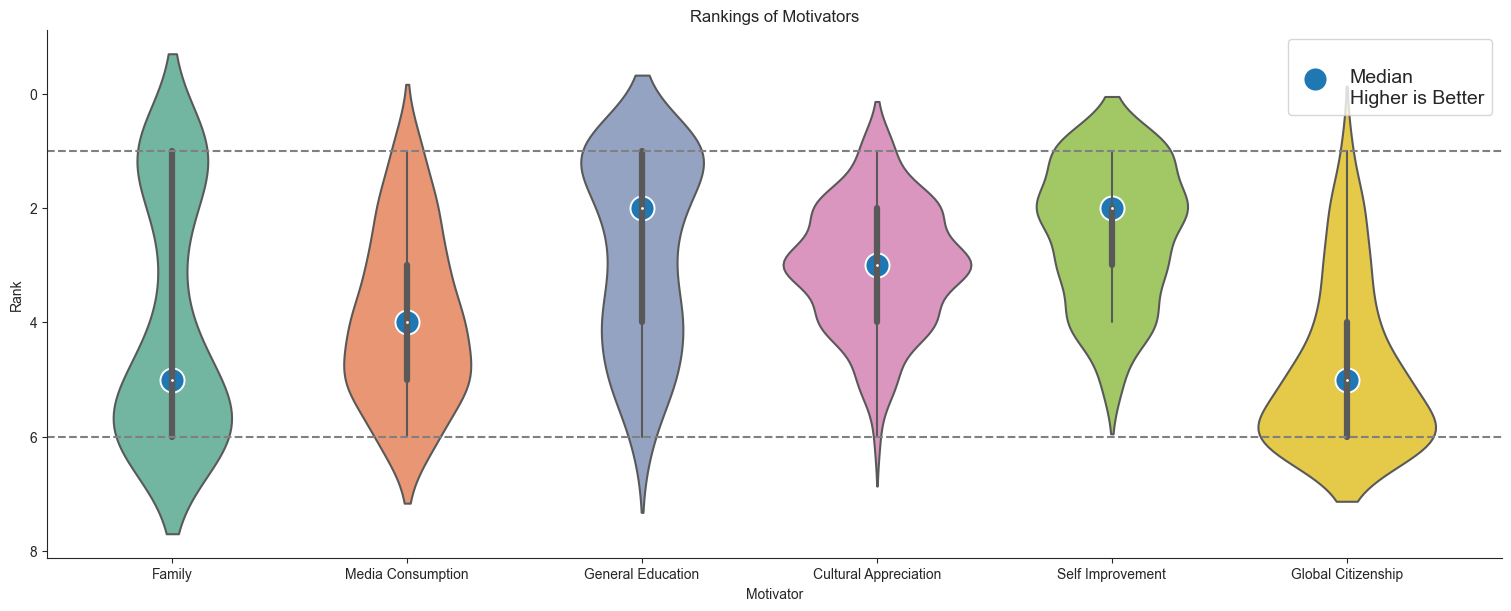

In [12]:
# Visualize the rankings as a violin plot
fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
sns.violinplot(x="Motivator", y="Rank", data=rankings, palette='Set2')

# Plot the median rank for each motivator
sns.scatterplot(data=summary_stats_df.T.reset_index()['Median'], s=300, 
                label='\nMedian\nHigher is Better')

# Place dashed lines at the 1st and 6th rank
ax.axhline(1, ls='--', color='grey')
ax.axhline(6, ls='--', color='grey')

ax.legend(loc='upper right', fontsize=14)

# Flip the y axis
ax.invert_yaxis()
# Set the title
ax.set_title('Rankings of Motivators')
plt.show()

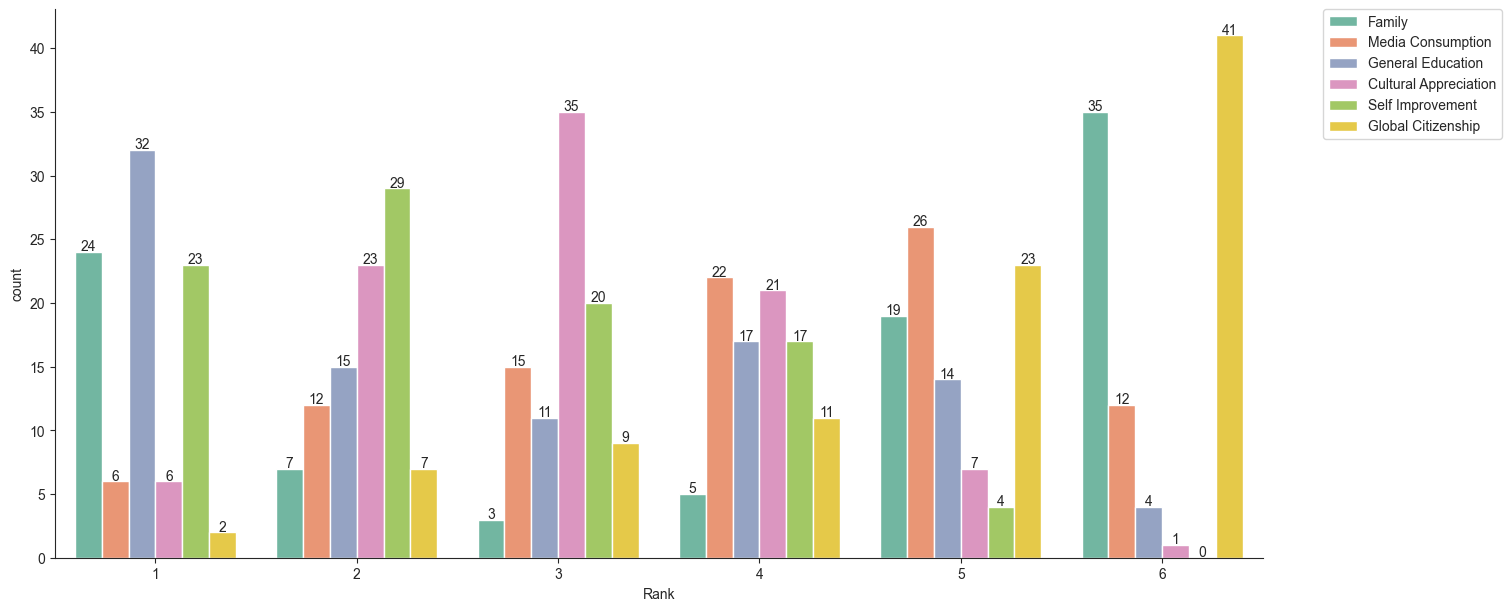

In [16]:
# Generate a countplot of the rankings to see the distribution
fig, ax = plt.subplots(figsize=(15, 6), constrained_layout=True)
sns.countplot(x="Rank", data=rankings, palette='Set2', hue='Motivator')

# Put the counts above the bars
for p in ax.patches:
    height = round(p.get_height())
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, height, ha="center")

# Place the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [29]:
# Conduct Friedman Test
friedman_test = friedman(data=rankings, dv='Rank', within='Motivator', subject='index')

# Nename the columns to be more readable
friedman_test = friedman_test.rename(columns={
    'p-unc': 'p_value', 
    'W': 'Kendall\'s W',
    'ddof1': 'Degrees of Freedom',
    'Q': 'Chi-Squared Score',}
)

# Print out the results
friedman_test

,Source,Kendall's W,Degrees of Freedom,Chi-Squared Score,p_value
Friedman,Motivator,0.228766,5,106.376344,2.387515e-21


This is actually quite interesting results due to the low Kendall's $W$ and super small $p$-value. 

With the low Kendall's $W$ of 0.2288, this essentially states that rankings across individuals flucates and don't maintain a consistent pattern. 

With the super low $p$ value, this tells us that our results are not due to random chance and that the distribution of rankings is not even.

Together this actually tells us that the motivators are sporadic and that students taking language classes don't necessarily converge towards a common motivator for why they take these classes.

### Conclusion
---
From our Friedman Test, we see that there is a significant difference in the way which students rank their motivators, there are some motivators which are consistently ranked higher or lower than another.


 However, the degree to this difference is not incredibly pronounced meaning that the order to which people rank their motivators is highly varied.